#### Anamoly Detetection:
    Anamoly Detection is also kind of unspervised learning. It is about finding anamolies or unusual events in the data.
    
    Eg: Finding defective engines in Air crafts engine manufcaturing, defective phones in phone manufacturing, fraud detection etc
    
    How Anamoly detection is performed?
    -----------------------------------
        Anomaly detection is carried out using "Density Estimation" with a Gaussian distribution model more commonly
    
    What is density estimation?
    ----------------------------
        Density refers to the likelihood(probability) of observing a particular data point or a set of data points. It represents the probability of data points being distributed within a certain region of the data space. Likelihood of observing/seeing a particular data point x in the same distribution is basically estimating the density of x
        
        The density function (also known as the probability density function or PDF) is used to describe this distribution of data in continuous domains. 
        
        For a random variable X, the density function f(x) gives the probability of X P(X) taking a specific value x.
        
        Density estimation is the process of estimating this density function(PDF) from a given set of data points, which allows us to understand the distribution of the data and make inferences about the likelihood of observing new data points within the same distribution.
        
        Simply, Density estimation is nothing but estimating the underlying probability distribution of a set of data
        
       If any of the input example in X doesnt belong to dense area or deviates from the dense of the estimated probability distribution(say gaussian distribution) then it is treated as anamoly. 

#### Density Estimation
       Density estimation is a statistical technique used to estimate the underlying probability distribution of a set of data points. The goal of density estimation is to model the distribution of the data in order to understand its characteristics and infer the likelihood of observing new data points within the same distribution.

    In simple terms, density estimation allows us to estimate the probability of observing a data point at a specific location in the data space. It is particularly useful when dealing with continuous data, where we want to understand the probability distribution of the data rather than just specific data points.

    There are various methods for density estimation, each with its own strengths and weaknesses. Some common density estimation techniques include:

        Histograms: This method divides the data range into intervals (bins) and counts the number of data points falling into each bin. The height of each bin represents an estimate of the data density in that interval.

        Kernel Density Estimation (KDE): KDE is a non-parametric method that places a kernel (usually a Gaussian or Epanechnikov kernel) at each data point and sums them up to obtain a smoothed estimate of the underlying density.

        Parametric Methods: These methods assumes a specific functional form for the underlying distribution, such as Gaussian (normal) distribution or exponential distribution. The parameters of the chosen distribution are estimated from the sample data(training data). FOr guassian, the parameters are mu and sigma

        Mixture Models: These models assume that the data is a combination of several component distributions. Each component represents a different cluster or group of data points, and the model's parameters are estimated to represent the mixture.

        Density estimation is often a crucial step in many applications, including anomaly detection, data clustering, generating synthetic data, and modeling complex data distributions. The choice of density estimation method depends on the nature of the data, the assumptions made about the underlying distribution, and the specific application at hand.

#### Anamoly detection using density estimation with a Gaussian distribution model
    Density estimation => likelihood of input data X = P(X)
    
    Assuming that the  underlying true distribution is Gaussain Distribution i.e assuming that the majority of the data points follow a Gaussian (normal) distribution, and any data points that significantly deviate from this distribution are considered anomalies 
    
    
    Steps:
    -------
    1. Data Preprocessing
        - Training data {x i=1 to m}, features 1..n
        - Ensure that your data is numeric and continuous.
        - Normalize or scale the features to have zero mean and unit variance to make the features comparable.
    2. Choose the Features
        - Select the features that are relevant for anomaly detection.
    3. Train a Gaussian Distribution Model
        For each feature, fit the parameters for each feature i.e estimate the mean and variance of each feature from the training data.
                        μ = (x₁ + x₂ + ... + xm) / m
                        σ = sqrt(((Σ(xᵢ - μ)²) / (m - 1)))
    
              Probability density function (PDF) of the Gaussian distribution is given by: (PDF gives the bell curve X, P(X))
                        Gaussian PDF P(xi) = 1 / √2π σ * e^ -((x - μ)^2 / 2 σ^2)
              where x is the feature value, μ is the mean, and σ is the standard deviation of that feature
          
     4. Calculate Anomaly Score for the data points
        For each data point, the anomaly score for a data point or the probability of a data point is then calculted as the product of the probabilities for all features.
        
                 P(X) = P(x1, μ1, σ1^2) * P(x2, μ2, σ2^2)........ * P(xn, μn, σn^2)
                 
     5. Set epsilon, a Threshold
        Decide on a threshold (e.g., using cross-validation) to classify data points as normal or anomalies. Points with anomaly scores above/below the threshold are considered anomalies.
                                P(xi) < threshold => x_test as anamoly
    6. Detect Anomalies:
        Test the anomaly detection model on the test dataset. Any data point with an anomaly score above the threshold is considered an anomaly. This implies that this input data occuring is very less likely and will be considered as anamoly
    
    Keep in mind that using a single Gaussian distribution may not be effective for datasets with complex distributions or high-dimensional data. In such cases, you may need to consider more sophisticated density estimation techniques or use other anomaly detection algorithms like Isolation Forest, Local Outlier Factor (LOF), or One-Class SVM.

    
    Evaluation and hyperparameter epsilon tuning:
    ---------------------------------------------
    Imagine we have very small of labeled anamalous data collected from over the years. USe them to create test and cv test inorder to tune hyperparater and model evaluation.
    
    Additionally, it's essential to evaluate the performance of your anomaly detection model thoroughly using metrics like confusion matrix, precision, recall, F1-score, or the Receiver Operating Characteristic (ROC) curve to assess its effectiveness.
    
    Choosing features for anamoly detection:
    ----------------------------------------
    - First plot each feature using plt.hist(X)
    - Use Gaussian features when the distribution of X seems like bell curve
    - Change Non Gaussian features to Gaussian using techniques 
        - like Box Cox transformation
        - adding transformations the features like log(x), log(x + 1), log(x + C), 
        - x**2, sqrt(x), x**3, X**1/3, X**1/4
        - log(1 + x**2)
     Note: remember to apply all the transformations done to training set to test set as well

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib inline

#### 2 - Anomaly detection

    2.1 Problem Statement
    In this exercise, you will implement an anomaly detection algorithm to detect anomalous behavior in server computers.

    The dataset contains two features -

       - throughput (mb/s) and
       - latency (ms) of response of each server.
       
    While your servers were operating, you collected m=307 examples of how they were behaving, and thus have an unlabeled dataset {x1,..,xm}.

    You suspect that the vast majority of these examples are “normal” (non-anomalous) examples of the servers operating normally, but there might also be some examples of servers acting anomalously within this dataset.
    
    You will use a Gaussian model to detect anomalous examples in your dataset.

    You will first start on a 2D dataset that will allow you to visualize what the algorithm is doing.
    
    On that dataset you will fit a Gaussian distribution and then find values that have very low probability and hence can be considered anomalies.
    
    After that, you will apply the anomaly detection algorithm to a larger dataset with many dimensions.

##### 2.2 Dataset
    You will start by loading the dataset for this task.

    The load_data() function shown below loads the data into the variables X_train, X_val and y_val
    You will use X_train to fit a Gaussian distribution
    You will use X_val and y_val as a cross validation set to select a threshold and determine anomalous vs normal examples

In [15]:
def load_data():
    X = np.load("./X_part1.npy")
    X_val = np.load("./X_val_part1.npy")
    y_val = np.load("./y_val_part1.npy")
    return X, X_val, y_val

X_train, X_val, y_val = load_data()

In [17]:
print(X_train.shape)
print(X_val.shape)
print(Counter(y_val)) #see this is skewed data set just like how we need to for anamolies dataset

(307, 2)
(307, 2)
Counter({0: 298, 1: 9})


In [18]:
# Display the first five elements of X_train
print("The first 5 elements of X_train are:\n", X_train[:5])  

The first 5 elements of X_train are:
 [[13.04681517 14.74115241]
 [13.40852019 13.7632696 ]
 [14.19591481 15.85318113]
 [14.91470077 16.17425987]
 [13.57669961 14.04284944]]


In [19]:
# Display the first five elements of X_val
print("The first 5 elements of X_val are\n", X_val[:5])  

The first 5 elements of X_val are
 [[15.79025979 14.9210243 ]
 [13.63961877 15.32995521]
 [14.86589943 16.47386514]
 [13.58467605 13.98930611]
 [13.46404167 15.63533011]]


##### Visualize your data
    Before starting on any task, it is often useful to understand the data by visualizing it.

    For this dataset, you can use a scatter plot to visualize the data (X_train), since it has only two properties to plot (throughput and latency)

    Your plot should look similar to the one below

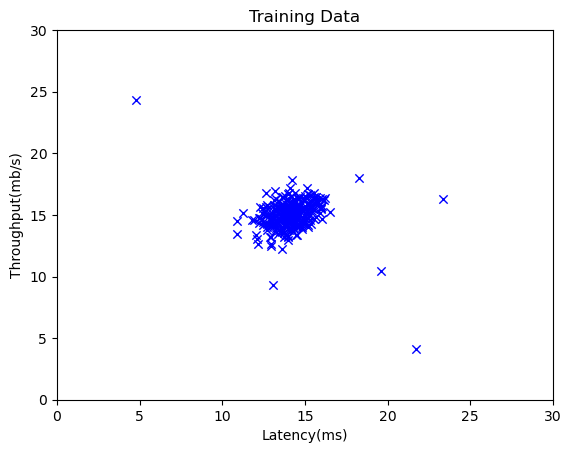

In [36]:
def plot_data(X):
    fig, ax = plt.subplots(1, 1)
    ax.scatter(X[:, 0], X[:, 1], c="b", marker="x", lw=1)
    ax.set_xlabel(r"Latency(ms)")
    ax.set_ylabel(r"Throughput(mb/s)")
    ax.set_title("Training Data")
    # Set axis range
    ax.axis([0, 30, 0, 30])
    plt.show()

#plot the original data
plot_data(X_train)   

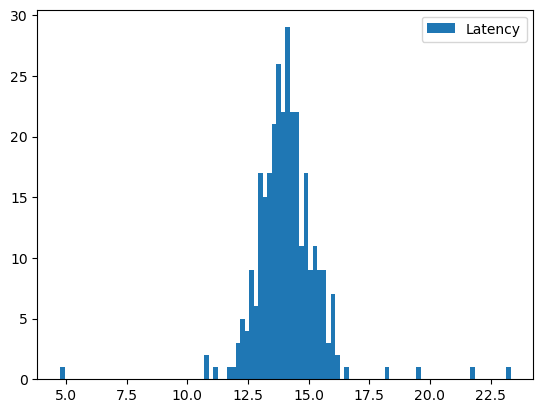

In [33]:
#check the distribution of data of each feature
plt.hist(X_train[:, 0], bins=100, label="Latency")
plt.legend()
plt.show()

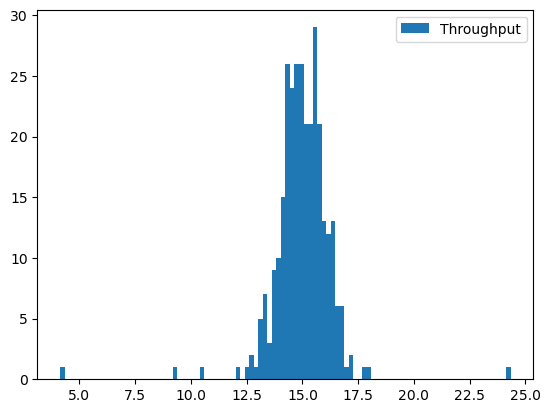

In [35]:
#check the distribution of data of each feature
plt.hist(X_train[:, 1], bins=100, label="Throughput")
plt.legend()
plt.show()

#### 2.3 Gaussian distribution
    To perform anomaly detection, you will first need to fit a model to the data’s distribution.

    Given a training set {x1,...,xm} you want to estimate the Gaussian distribution for each of the features xi.

    Recall that the Gaussian distribution is given by
    
                P(x; μ, σ^2) = 1 / √2πσ^2 * e^ -((x - μ)^2 / 2 σ^2)
               
               
    where μ is the mean and σ^2 controls the variance.

    For each feature i=1,..,n, you need to find parameters μ and σ^2 that fit the data in the i-th dimension {xi₁, xi₂,..,xi_m}(the i-th dimension of each example).

##### 2.2.1 Estimating parameters for a Gaussian
    Implementation:
        Your task is to complete the code in estimate_guassian_parameters below.
        
    Exercise 1
    -----------
    Please complete the estimate_guassian_parameters function below to calculate mu (mean for each feature in X)and var (variance for each feature in X).

    You can estimate the parameters, (μi, σi^2), of the i-th feature by using the following equations. To estimate the mean, you will use:
                            μ = (xi₁ + xi₂ + ... + xim) / m
            
    and for the variance you will use:
    
                         σ^2 = 1/m Σ(xᵢ - μ)²




In [37]:
def estimate_guassian_parameters(X_train):
    """
    Estimate Parameters mu and std of Guassian distribution for all the features from the sample i.e training data
    Args:
        X_train (ndarray): (m, n) Data matrix
    
    Returns:
        mu (ndarray): (n,) Mean of all features
        var (ndarray): (n,) Variance of all features
    
    """
    m, n = X_train.shape
    mu = (1 / m) * np.sum(X_train, axis=0)
    var = (1 / m) * np.sum((X_train - mu)**2, axis=0)
#     mu = np.zeros(n,)
#     var = np.zeros(n,)
#     for feature in range(n):
#         mu[feature] = np.mean(X_train[:, feature], axis=0)
#         std = np.std(X_train[:, feature], axis=0)
#         var[feature] = std ** 2
    return mu, var

In [39]:
# Estimate mean and variance of each feature
mu, var = estimate_guassian_parameters(X_train)              

print("Mean of each feature:", mu)
print("Variance of each feature:", var)

Mean of each feature: [14.11222578 14.99771051]
Variance of each feature: [1.83263141 1.70974533]


    Now that you have completed the code in estimate_gaussian, we will fit Gaussian distribution to the data and visualize the contours of the fitted Gaussian distribution.

In [51]:
def multivariate_gaussian(X, mu, var):
    """
    Computes the probability
    density function of the examples X under the multivariate gaussian 
    distribution with parameters mu and var. If var is a matrix, it is
    treated as the covariance matrix. If var is a vector, it is treated
    as the var values of the variances in each dimension (a diagonal
    covariance matrix
    """
    k = len(mu) #getting the number of features
    if var.ndim == 1:
        var = np.diag(var) #Extract a diagonal or construct a diagonal array
    X = X - mu
    p = (2* np.pi)**(-k/2) * np.linalg.det(var)**(-0.5) * np.exp(-0.5 * np.sum(np.matmul(X, np.linalg.pinv(var)) * X, axis=1))
    return p

##### Multivariate Gaussian distribution
     The multivariate Gaussian distribution is a generalization of the univariate Gaussian distribution to multiple dimensions. In the case of a univariate Gaussian, we have a single random variable, whereas in the multivariate case, we have multiple random variables (or dimensions).

    For a random vector X of dimension k (k ≥ 1), the probability density function (PDF) of the multivariate Gaussian distribution is given by:

        f(X | μ, Σ) = (2π)^(-k/2) * |Σ|^(-1/2) * exp[-0.5 * (X - μ)ᵀ * Σ^(-1) * (X - μ)],

    where:

    X is the k-dimensional random vector (i.e., a column vector).
    μ is the k-dimensional mean vector, representing the average value of each dimension.
    Σ is the k x k covariance matrix, describing the relationships between the random variables and their variances. 
            Σ = Cov(X) = E[(X − µ)(X − µ)T] (symmetric, positive semi-definite matrix)
    
    (2π)^(-k/2) is a normalization constant to ensure the integral of the PDF over the entire k-dimensional space is equal to 1.
    |Σ|^(-1/2) is the determinant of the covariance matrix Σ raised to the power of -1/2, used to normalize the PDF.
    exp[...] is the exponential function, and the argument inside represents the Mahalanobis distance between the random vector X and the mean vector μ. The Mahalanobis distance takes into account the correlations and scales between different dimensions, making the multivariate Gaussian more flexible than using Euclidean distance.
    
    In simpler terms, the multivariate Gaussian distribution represents a bell-shaped probability distribution in multiple dimensions. The mean vector μ determines the center of the distribution, while the covariance matrix Σ controls the spread and shape of the distribution in each dimension and the relationships between the dimensions. The distribution is fully characterized by these parameters, and they are used in various statistical and machine learning applications for modeling and inference.

##### Covariance matrix
     The concept of the covariance matrix is vital to understanding multivariate Gaussian distributions. For a pair of random variables X and Y , their covariance is defined as
                Cov[X, Y] = E[(X − E[X])(Y − E[Y])] = E[XY] − E[X]E[Y] 
         where E[X] and E[Y] are the expected values or mean of the variable X and Y
         
    E(X) refers to the expected value (or mean) of a random variable X. It represents the average value or central tendency of the variable, assuming that the variable follows a probability distribution.

    For a discrete random variable X, the expected value E(X) is calculated as the sum of the products of each possible value of X and its corresponding probability:

                    E(X) = Σ [x * P(X = x)],

    where x is each possible value of X, and P(X = x) is the probability of X taking the value x.

    For a continuous random variable X, the expected value E(X) is calculated as the integral of the product of X and its probability density function (PDF):

                    E(X) = ∫ [x * f(x)] dx,

        where f(x) is the probability density function of X.
                
     When working with multiple variables, the covariance matrix provides a succinct way to summarize the covariances of all pairs of variables. In particular, the covariance matrix, which we usually denote as Σ, is the n × n matrix whose (i, j)th entry is Cov[Xi, Xj]

In [52]:
# Returns the density of the multivariate normal
# at each data point (row) of X_train
p = multivariate_gaussian(X_train, mu, var)
print(p.shape)
print(p[:5])

(307,)
[0.06470829 0.05030417 0.07245035 0.05031575 0.06368497]


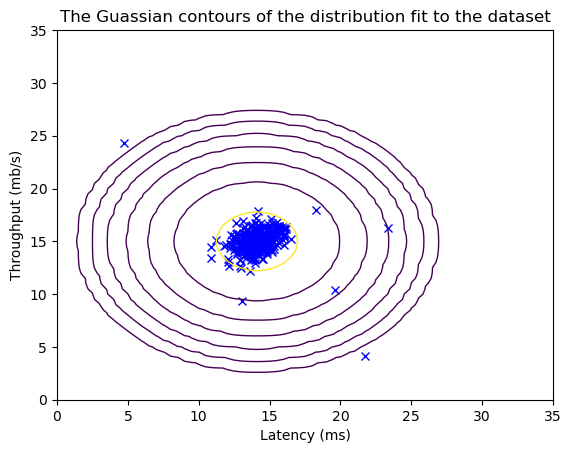

In [110]:
#plot the  fitted Gaussian distribution
def visualize_fit(X, mu, var):
    """
    This visualization shows you the 
    probability density function of the Gaussian distribution. Each example
    has a location (x1, x2) that depends on its feature values.
    """
    #create the x and y spaces
    x_1 = np.arange(0, 35.5, 0.5)
    x_2 = np.arange(0, 35.5, 0.5)
    X_1, X_2 = np.meshgrid(x_1, x_2)
    points = np.c_[X_1.ravel(), X_2.ravel()]
    Z = multivariate_gaussian(points, mu, var) 
    Z = Z.reshape(X_1.shape)
    plt.plot(X[:, 0], X[:, 1], "bx")
    if np.sum(np.isinf(Z)) == 0: #np.isinf() gives boolean array anf sum adds the no of true elements
        plt.contour(X_1, X_2, Z, linewidths=1, levels=10**(np.arange(-20., 1, 3)))
    plt.title("The Guassian contours of the distribution fit to the dataset")
    plt.xlabel("Latency (ms)")
    plt.ylabel("Throughput (mb/s)")

visualize_fit(X_train, mu, var)

##### 2.2.2 Selecting the threshold 
    Now that you have estimated the Gaussian parameters, you can investigate which examples have a very high probability given this distribution and which examples have a very low probability.

    The low probability examples are more likely to be the anomalies in our dataset.
    
    One way to determine which examples are anomalies is to select a threshold ε based on a cross validation set.
    
    In this section, you will complete the code in select_threshold to select the threshold epsilon using the F1 score on a cross validation set.

    For this, we will use a cross validation set {(xcv1, ycv1),..,(xcvm, ycvm)}, where the label y=1 corresponds to an anomalous example, and y=0 corresponds to a normal example.

    For each cross validation example, we will compute p(xcvi). The vector of all of these probabilities p(xcv1,,..,xcvm) is passed to select_threshold in the vector p_val.
    
    The corresponding labels ycv1,..,ycvm is passed to the same function in the vector y_val.

##### Exercise 2
    Please complete the select_threshold function below to find the best threshold to use for selecting outliers based on the results from a validation set (p_val) and the ground truth (y_val).

    In the code select_threshold, make a loop that will try many different values of ε and select the best ε based on the F1 score.

    You need implement code to calculate the F1 score from choosing epsilon as the threshold and place the value in F1.

    Recall that if an example x has a low probability p(x) < ε, then it is classified as an anomaly.

    Then, you can compute precision and recall by:

                    prec = tp / tp + fp
                    rec = tp / tp + fn


    where

     tp is the number of true positives: the ground truth label says it’s an anomaly and our algorithm correctly classified it as an anomaly.

     fp is the number of false positives: the ground truth label says it’s not an anomaly, but our algorithm incorrectly classified it as an anomaly.

     fn is the number of false negatives: the ground truth label says it’s an anomaly, but our algorithm incorrectly classified it as not being anomalous.

    The F1 score is computed using precision (prec) and recall (rec) as follows:
                            
                            F1 = 2 prec rec / prec + rec

    Implementation Note: In order to compute tp, fp and fn, you may be able to use a vectorized implementation rather than loop over all the examples.

In [121]:
def select_threshold(p_val, y_val):
    """
    Finds the best threshold to use for selecting outliers 
    based on the results from a validation set (p_val) 
    and the ground truth (y_val)
    
    Args:
        p_val (ndarray): Results on validation set
        y_val (ndarray): Ground truth on validation set
        
    Returns:
        epsilon (float): Threshold chosen 
        F1 (float):      F1 score by choosing epsilon as threshold
    """ 
    step_size = (max(p_val) - min(p_val)) / 1000
    thresholds = np.arange(min(p_val), max(p_val), step_size)
    best_threshold = min(p_val)
    best_F1 = 0.0
    F1 = 0.0
    for epsilon in thresholds:
        #calculate fp, tp, fn
        y_val_preds = (p_val < epsilon) # 1 if p_val < epsilon else 0
        tp = np.sum((y_val_preds == 1) & (y_val == 1))
        fp = sum((y_val_preds == 1) & (y_val == 0))
        fn = np.sum((y_val_preds == 0) & (y_val == 1))
        prec = tp / (tp + fp)
        rec = tp / (tp + fn)
        F1 = (2 * prec * rec) / (prec + rec)
        if F1 > best_F1:
            best_F1 = F1
            best_threshold = epsilon
    return best_threshold, best_F1


p_val = multivariate_gaussian(X_val, mu, var)
threshold, f1 = select_threshold(p_val, y_val)

C:\Users\malla\AppData\Local\Temp\ipykernel_12340\1811818141.py:26: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp / (tp + fp)


In [90]:
print('Best epsilon found using cross-validation: %e' % threshold)
print('Best F1 on Cross Validation Set: %f' % f1)

Best epsilon found using cross-validation: 8.990853e-05
Best F1 on Cross Validation Set: 0.875000


    Now we will run your anomaly detection code and circle the anomalies in the plot 

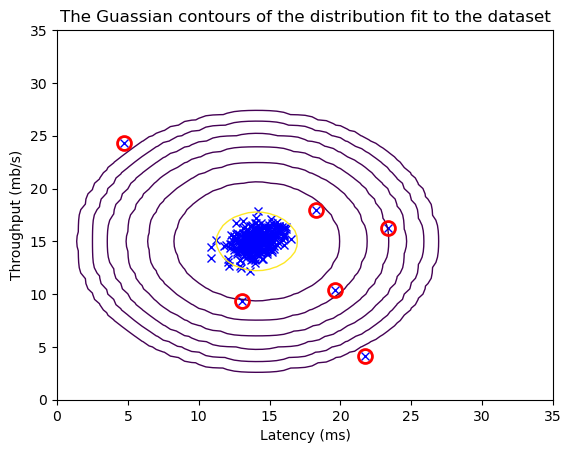

In [111]:
mu, var = estimate_guassian_parameters(X_train)

p_train = multivariate_gaussian(X_train, mu, var)

# Visualize the fit
visualize_fit(X_train, mu, var)

#find the outliers
anamolies = p_train < threshold
plt.plot(X_train[anamolies, 0], X_train[anamolies, 1], "ro", markersize= 10, markerfacecolor="none", markeredgewidth=2)
plt.show()

#### 2.4 High dimensional dataset
    Now, we will run the anomaly detection algorithm that you implemented on a more realistic and much harder dataset.

    In this dataset, each example is described by 11 features, capturing many more properties of your compute servers.

    Let's start by loading the dataset.

    The load_data() function shown below loads the data into variables X_train_high, X_val_high and y_val_high
    _high is meant to distinguish these variables from the ones used in the previous part
    
    We will use X_train_high to fit Gaussian distribution
    We will use X_val_high and y_val_high as a cross validation set to select a threshold and determine anomalous vs normal examples

In [112]:
def load_data_multi():
    X = np.load("./X_part2.npy")
    X_val = np.load("./X_val_part2.npy")
    y_val = np.load("./y_val_part2.npy")
    return X, X_val, y_val

In [114]:
print ('The shape of X_train_high is:', X_train_high.shape)
print ('The shape of X_val_high is:', X_val_high.shape)
print ('The shape of y_val_high is: ', y_val_high.shape)

The shape of X_train_high is: (1000, 11)
The shape of X_val_high is: (100, 11)
The shape of y_val_high is:  (100,)


In [120]:
X_train_high, X_val_high, y_val_high = load_data_multi()

mu_high, var_high = estimate_guassian_parameters(X_train_high)

p_train_high = multivariate_gaussian(X_train_high, mu_high, var_high)

#selecting the threshold
p_val_high = multivariate_gaussian(X_val_high, mu_high, var_high)
threshold_high, f1_high = select_threshold(p_val_high, y_val_high)

print('Best epsilon found using cross-validation: %e'% threshold_high)
print('Best F1 on Cross Validation Set:  %f'% f1_high)

#find the outliers
anamolies = p_train_high < threshold
print('# Anomalies found: %d'% sum(p_train_high < threshold_high))

Best epsilon found using cross-validation: 1.377229e-18
Best F1 on Cross Validation Set:  0.615385
# Anomalies found: 117


C:\Users\malla\AppData\Local\Temp\ipykernel_12340\3506849133.py:26: RuntimeWarning: invalid value encountered in long_scalars
  prec = tp / (tp + fp)
